<a href="https://colab.research.google.com/github/cvillanue/EEG-Braille-Analysis/blob/main/EEG_Braille_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 70.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install mne-bids


In [ ]:
from mne_bids import BIDSPath, read_raw_bids

Extracting parameters from /content/drive/MyDrive/sub-02/ses-01/eeg/sub-02_ses-01_task-letters_run-01_eeg.vhdr...
Setting channel info structure...


<ipython-input-5-cff5e27b8a74>:8: RuntimeWarning: No coordinate information found for channels ['HEOG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-5-cff5e27b8a74>:8: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Reading 0 ... 5226399  =      0.000 ...  5226.399 secs...


<ipython-input-5-cff5e27b8a74>:8: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['HEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 1917-04-19 12:48:32 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>
Using matplotlib as 2D backend.


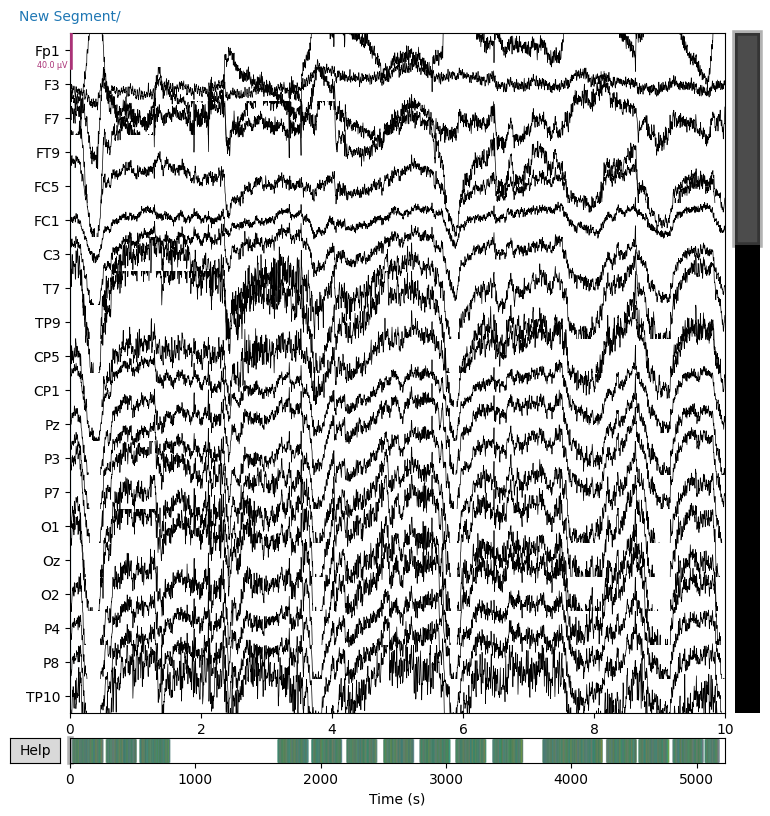

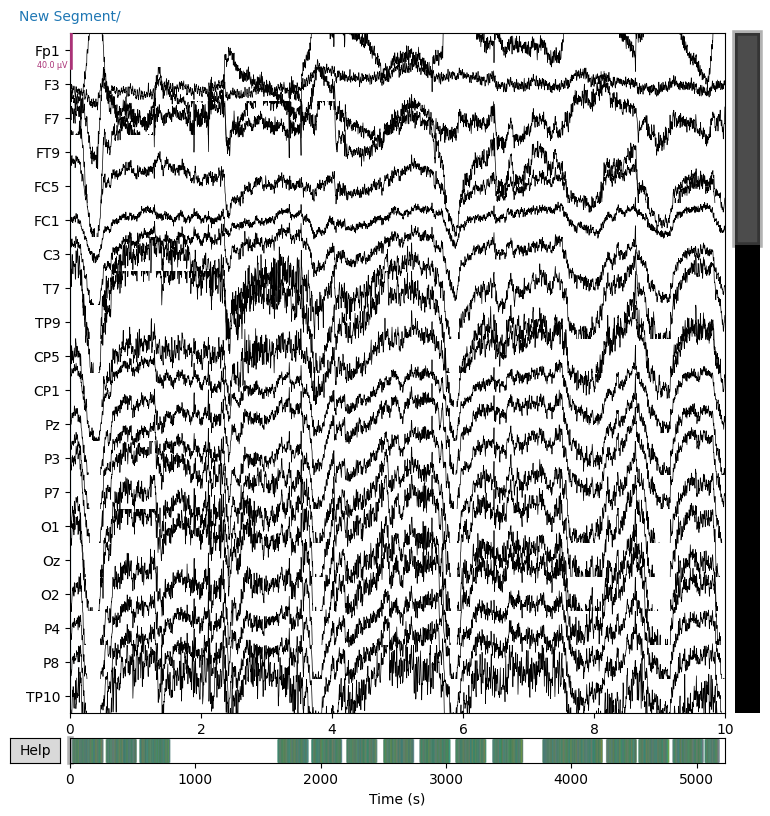

In [ ]:
import mne

subject = "sub-02"
session = "ses-01"
run = "01"

vhdr_path = f"/content/drive/MyDrive/{subject}/{session}/eeg/{subject}_{session}_task-letters_run-{run}_eeg.vhdr"
raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
print(raw.info)

raw.plot()


In [ ]:
raw.describe()

<RawBrainVision | sub-02_ses-01_task-letters_run-01_eeg.eeg, 64 x 5226400 (5226.4 s), ~2.49 GiB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV     -4123.69     -35.12      -9.13      24.98   12024.42
 1  F3    EEG   µV      -312.17     -13.43      -0.05      13.20     850.24
 2  F7    EEG   µV     -1121.36     -30.74       0.38      32.01    1801.70
 3  FT9   EEG   µV      -977.30     -40.05       1.24      40.93     728.72
 4  FC5   EEG   µV      -870.24     -19.14       0.61      19.69    1358.44
 5  FC1   EEG   µV      -196.05      -9.58       1.05      10.44     261.36
 6  C3    EEG   µV      -525.99     -14.68       2.47      16.56     699.69
 7  T7    EEG   µV     -1614.24     -23.75       3.46      26.55    1322.29
 8  TP9   EEG   µV     -2799.24     -30.14       5.00      31.48    2986.44
 9  CP5   EEG   µV      -740.72     -18.12       3.72      21.75     922.75
10  CP1   EEG   µV      -326.96     -13.25       3.09 

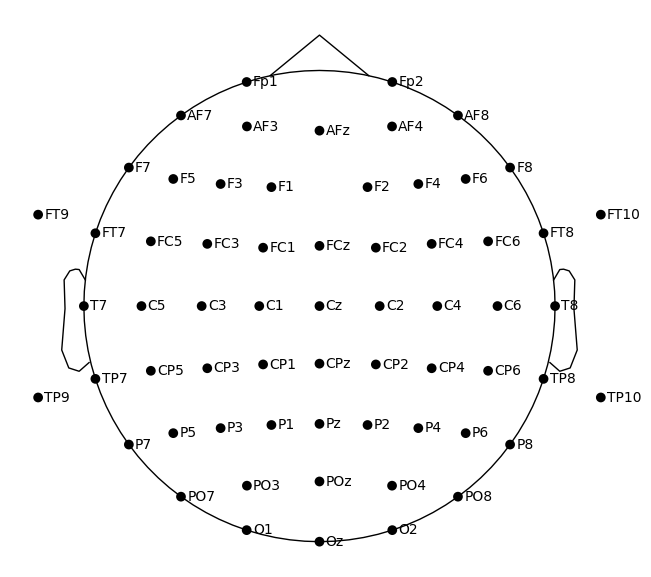

In [ ]:
import matplotlib.pyplot as plt

raw.plot_sensors(show_names=True)
plt.show()

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S200', 'Stimulus/S222', 'Stimulus/S253', 'Stimulus/S254', 'Stimulus/S255']
Event Markers: {'New Segment/': 99999, 'Stimulus/S  1': 1, 'Stimulus/S  2': 2, 'Stimulus/S  3': 3, 'Stimulus/S  4': 4, 'Stimulus/S  5': 5, 'Stimulus/S  6': 6, 'Stimulus/S  7': 7, 'Stimulus/S  8': 8, 'Stimulus/S  9': 9, 'Stimulus/S 10': 10, 'Stimulus/S 11': 11, 'Stimulus/S 12': 12, 'Stimulus/S 13': 13, 'Stimulus/S 14': 14, 'Stimulus/S 15': 15, 'Stimulus/S 16': 16, 'Stimulus/S100': 100, 'Stimulus/S101': 101, 'Stimulus/S200': 200, 'Stimulus/S222': 222, 'Stimulus/S253': 253, 'Stimulus/S254': 254, 'Stimulus/S255': 255}


<ipython-input-8-8422a341d508>:4: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, raw.info['sfreq'])


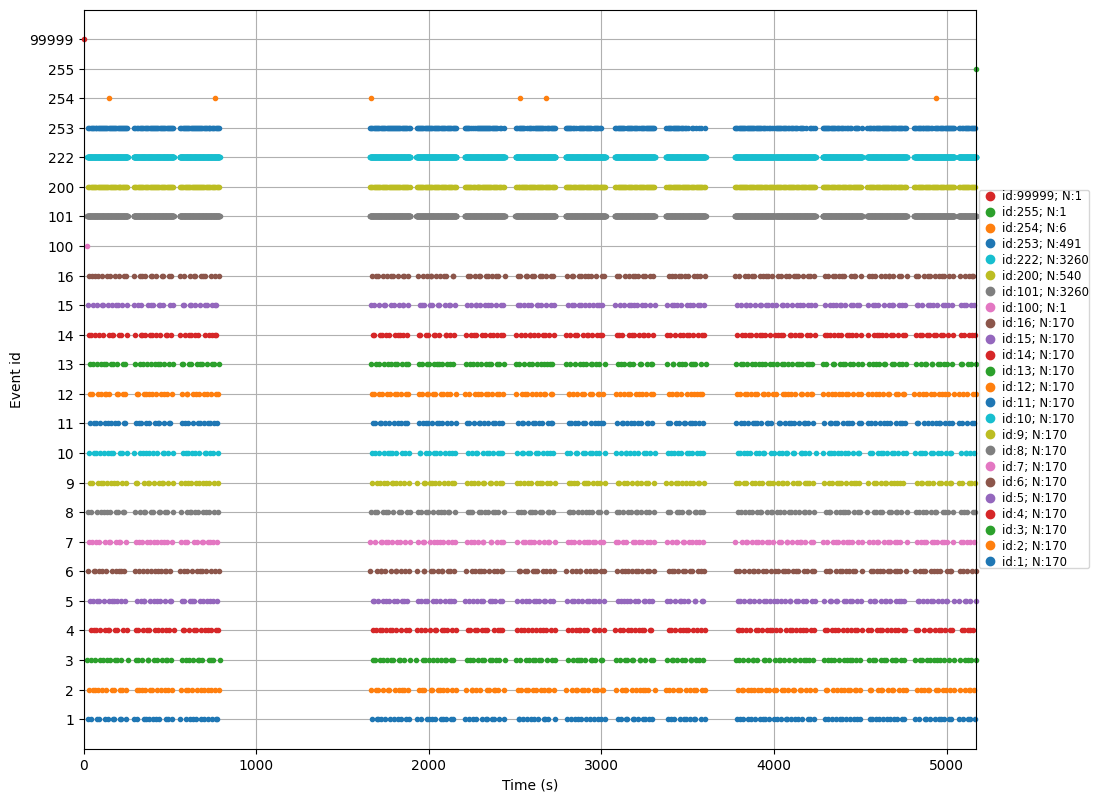

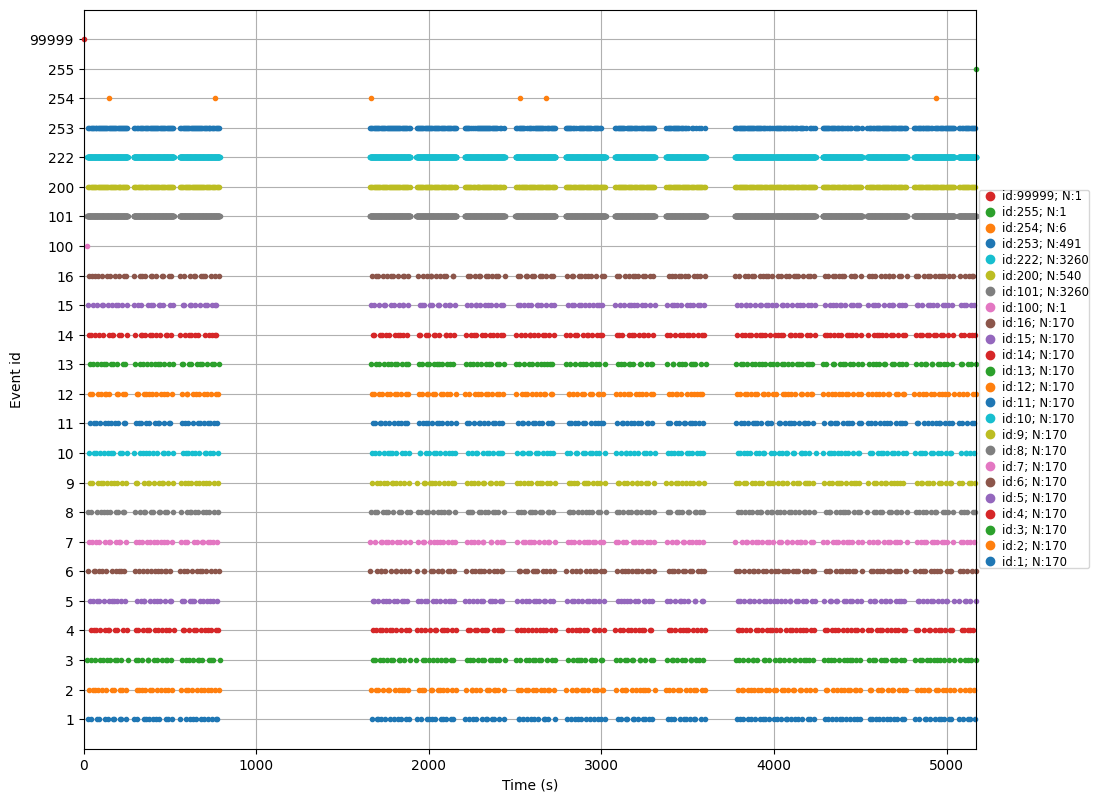

In [ ]:
# Extracting events from the raw data
events, event_id = mne.events_from_annotations(raw)
print("Event Markers:", event_id)
mne.viz.plot_events(events, raw.info['sfreq'])


In [ ]:
# Apply bandpass filter (0.5 - 40 Hz)
raw.filter(l_freq=0.5, h_freq=40)

# Plot ICA components
ica.plot_components()

#plotting raw frequency
raw.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.4s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


In [ ]:
# I think applying Independent Component Analysis (ICA) to remove artifacts would help
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw)

## Filter the Data for ICA

ICA is very good at capturing features of the data that explain the most variance. Recall that variance, statistically speaking, is any deviation from the mean. Blinks and eye movements are well-captured by ICA because they are so much larger than EEG, and so they contain a lot of the variance in the EEG recordings. Likewise, low-frequency drift in the data explains large amounts of variance, because of the 1/f property of EEG data discussed earlier — the lowest frequencies contain the most power.

For this reason, ICA works best on data that has more low-frequency power removed than the data that we ultimately want to analyze. So we will filter the data for ICA with a 1 Hz high-pass cutoff, rather than the 0.1 Hz cutoff as we used in the filtering lesson (which is a more typical cutoff for ERP data). We can compute ICA based on the 1 Hz filtered version of the data, identify the artifacts based on this, and then apply the same ICA decomposition (i.e., how ICA breaks the data down into components) to the data that were filtered as we wanted for ERP analysis. This allows us to filter the data optimally for ICA, and then apply the artifact correction to data filtered the way it should be for ERPs.

In [ ]:
# Filter settings
ica_low_cut = 1.0 # For ICA, we filter out more low-frequency power
hi_cut  = 30

raw_ica = raw.copy().filter(ica_low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.1s


### Segment data for ICA
ICA works best with segments of data, rather than the continuous raw data. We call segments of EEG data epochs, a word which means “a period of time”. Typically when talking about ERPs, epochs refers to the segments of data that are time-locked to experimental events of interest. Here, however, we use the term more generically to refer to any segment of EEG data. So here we will segment the entire raw data recording into a series of consecutive 1 s segments (i.e., 0-1 s, 1-2 s, etc.), ignoring the event markers for now. We save this series of epochs as epochs_ica.

In [ ]:
# Break raw data into 1 s epochs
tstep = 1.0
events_ica = mne.make_fixed_length_events(raw_ica, duration=tstep)
epochs_ica = mne.Epochs(raw_ica, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

Not setting metadata
5226 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5226 events and 1001 original time points ...
0 bad epochs dropped



The Auto Reject algorithm (used in eeg, is used to determine the threshold between noisy and clean channels), also known as rejection sampling, is a Monte Carlo method used to generate random samples **from a probability distribution that is difficult to sample directly. **It relies on sampling from a simpler, proposal distribution and then accepting or rejecting the samples based on a specific criterion.


In [ ]:
pip install autoreject

In [ ]:
from autoreject import AutoReject

ar = AutoReject(n_interpolate=[1, 2, 4],
                random_state=42,
                picks=mne.pick_types(epochs_ica.info,
                                     eeg=True,
                                     eog=False
                                    ),
                n_jobs=-1,
                verbose=False
                )

ar.fit(epochs_ica)

reject_log = ar.get_reject_log(epochs_ica)